# Machine Learning Models

As both the combined successful and unsuccessful datasets are highly imbalenced the usual accuracy mectric is not good enough to evalute the machine learing models and features. Therefore we require the precision and recall metrics which are better suited to evaluating the models ability to idetnify True positives, i.e successful companies which is greater intererest.

$\large\textrm{Precision}=\large\frac{\textrm{True Positives (TP)}}{\textrm{True Positives (TP)}+\textrm{False Positives (FP)}}$<br><br>

$\large\textrm{Recall}=\large\frac{\textrm{True Positives (TP)}}{\textrm{True Positives (TP)}+\textrm{False Negatives (FN)}}$<br>

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly (sklearn). Therefore we are most interested in generating models with both high precision and recall, but precision should take priority.

In [318]:
import datetime, json, scipy, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5] 
warnings.filterwarnings('ignore')

# Load Previously Generated Features

Normalizing the countable numerical values such as the number of investors by dividing through with the maximum value in the dataset. This may change as more entries are added so a dynamic normalizer maybe more appropriate.

In [2]:
base_path = '/Users/tejmoxham/Documents/Projects/vela_partners/'

In [499]:
# File path
csv_path = base_path+'/data/moneyball_processed/processed_2022-03-17_16_51_47_midas=10.csv'
df = pd.read_csv(csv_path)

# Noramlize columns
df['number_investors'] = df['number_investors']/np.max(df['number_investors'].values)

# Impute columns with missing data
df["qs_universities_of_founders_score_average"].fillna(df["qs_universities_of_founders_score_average"].mean(), inplace=True)
df["qs_universities_of_founders_score_max"].fillna(df["qs_universities_of_founders_score_max"].mean(), inplace=True)
df["qs_universities_of_founders_score_min"].fillna(df["qs_universities_of_founders_score_min"].mean(), inplace=True)

print(df['average_investor_score'].values)

# Display the combined MoneyBall dataframe head
print('Combined MoneyBall Dataframe Shape:', df.shape)
display(HTML(df.head(n=1).to_html()))

[0.47830549 0.23094959 0.34307581 ... 0.37196184 0.06592584 0.15147251]
Combined MoneyBall Dataframe Shape: (7615, 22)


,universities_of_founders,prev_companies_of_founders,top_popular_prev_comp_flag,top_success_prev_comp_flag,moneyball_prev_comp_success,investor_name,success,qs_universities_of_founders,qs_universities_of_founders_scores,qs_universities_of_founders_score_average,qs_universities_of_founders_score_max,qs_universities_of_founders_score_min,nobrand_investor_name,investor_scores,nobrand_investor_scores,number_investors,average_investor_score,nobrand_average_investor_score,max_investor_score,nobrand_max_investor_score,min_investor_score,nobrand_min_investor_score
0,Brigham Young University (BYU),"['CEO.Com', 'Omniture', 'Omniture', 'Stance', 'XANT.ai']",0,0,0,"['Paul Sagan', 'Mark Gorenberg', 'John Pestana', 'Hiroshi Mikitani', 'Marc Benioff', 'SV Angel', 'Ronald Conway', 'David Lee', 'Jeff Kearl', 'Transmedia Capital', 'Institutional Venture Partners', 'Andreessen Horowitz', 'Steven Singh', 'Hummer Winblad Venture Partners', 'Dan Rose', 'Lars Dalgaard', 'WPP', 'Zetta Venture Partners', 'Benchmark', 'Pelion Venture Partners']",1,['Brigham Young University'],[0.2],0.2,0.2,0.2,"['Paul Sagan', 'Mark Gorenberg', 'John Pestana', 'Hiroshi Mikitani', 'Marc Benioff', 'SV Angel', 'Ronald Conway', 'David Lee', 'Jeff Kearl', 'Transmedia Capital', 'Institutional Venture Partners', 'Steven Singh', 'Hummer Winblad Venture Partners', 'Dan Rose', 'Lars Dalgaard', 'WPP', 'Zetta Venture Partners', 'Pelion Venture Partners']","[0.5134548592078866, nan, nan, nan, 0.4161619674232913, 0.4114882050437383, 0.4998714482492323, 0.4275054133047855, 0.3003012530970266, 0.3032963786434849, 0.4258378202889673, 1.0, nan, nan, 0.4121418764031249, nan, 0.3365824534701194, 0.31804803591117, 1.0, 0.3315871717326701]","[0.5134548592078866, nan, nan, nan, 0.4161619674232913, 0.4114882050437383, 0.4998714482492323, 0.4275054133047855, 0.3003012530970266, 0.3032963786434849, 0.4258378202889673, nan, nan, 0.4121418764031249, nan, 0.3365824534701194, 0.31804803591117, 0.3315871717326701]",0.327869,0.478305,0.391356,1.0,0.513455,0.300301,0.300301


# Feature Selection

Selected features based on statistical analysis and feature analysis (later). Split the combined dataframe into training and testing dataset ensuring number of successful/unsuccessful rows are also evenly split.

In [471]:
test_size = 0.3

# All main numerical features
investor_features = ['number_investors',
                     'average_investor_score',
                     'nobrand_average_investor_score',
                     'max_investor_score', 
                     'nobrand_max_investor_score', 
                     'min_investor_score',
                     'nobrand_min_investor_score',]

founder_features = ['moneyball_prev_comp_success',
                    'top_success_prev_comp_flag',
                    'top_popular_prev_comp_flag',
                    'qs_universities_of_founders_score_average',
                    'qs_universities_of_founders_score_max',
                    'qs_universities_of_founders_score_min']

combined_features = founder_features+investor_features

X, y = df.loc[:, df.columns!='success'], df['success']
X_founder = X[founder_features].values
X_investor = X[investor_features].values
X_combined = X[combined_features].values

y = y.values

print('Features Shape:', X.shape)
print('Labels Shape:', y.shape, '\n')

print('(All) Successful Fraction:', np.sum(y)/y.size)
print('(Training) Successful Fraction:', np.sum(y_train)/y_train.size)
print('(Test) Successful Fraction:', np.sum(y_test)/y_test.size, '\n')

Features Shape: (7615, 21)
Labels Shape: (7615,) 

(All) Successful Fraction: 0.17439264609323704
(Training) Successful Fraction: 0.17448405253283303
(Test) Successful Fraction: 0.17417943107221007 



# Gradient Boosting Classifier (GBC)

Only founder features 

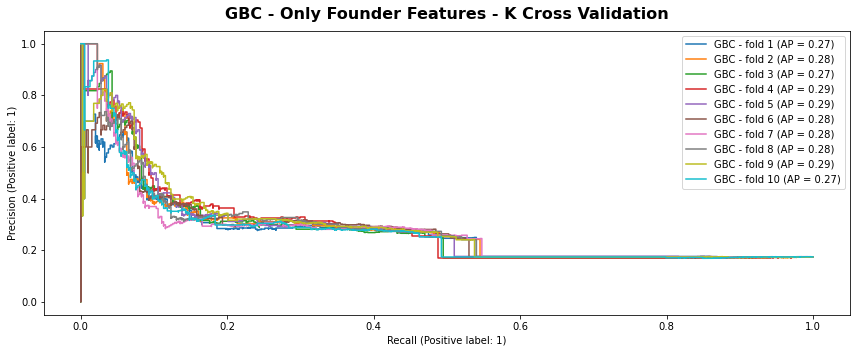

In [485]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_founder, y, stratify=y, test_size=test_size)

# Hyperparameters
GBC_params = {'loss': 'deviance',
              'n_estimators': 30,
              'learning_rate': 0.1,
              'subsample': 1,
              'max_depth': 10}

# Define the final model
GBC_model = GradientBoostingClassifier(**GBC_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    GBC_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(GBC_model, X_test, y_test, ax = plt.gca(), name="GBC - fold "+str(i+1))
plt.title('GBC - Only Founder Features - K Cross Validation', fontsize=16, fontweight='bold', y=1.02)
plt.legend(loc='upper right')
plt.tight_layout()

Only investor features

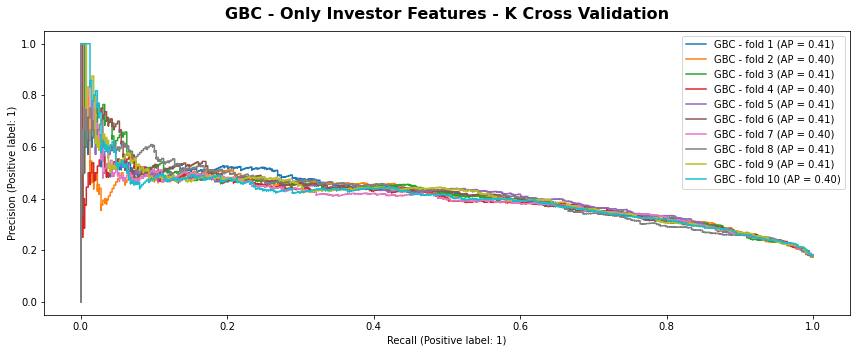

In [486]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_investor, y, stratify=y, test_size=test_size)

# Define the final model
GBC_model = GradientBoostingClassifier(**GBC_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    GBC_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(GBC_model, X_test, y_test, ax = plt.gca(), name="GBC - fold "+str(i+1))
plt.title('GBC - Only Investor Features - K Cross Validation', fontsize=16, fontweight='bold', y=1.02)
plt.legend(loc='upper right')
plt.tight_layout()

Combined founders and investor features

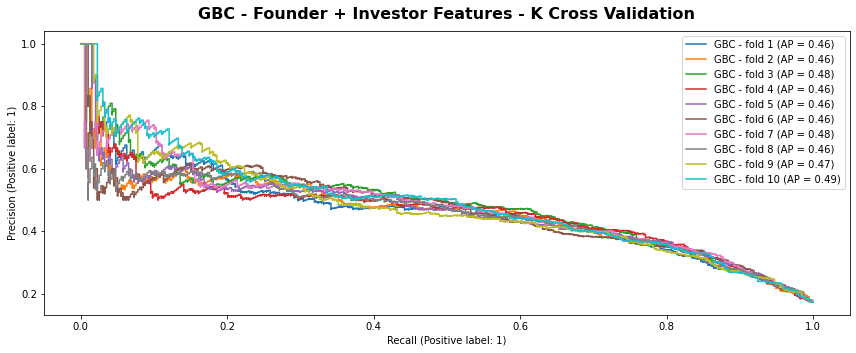

In [489]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, stratify=y, test_size=test_size)

# Define the final model
GBC_model = GradientBoostingClassifier(**GBC_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    GBC_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(GBC_model, X_test, y_test, ax = plt.gca(), name="GBC - fold "+str(i+1))
plt.title('GBC - Founder + Investor Features - K Cross Validation', fontsize=16, fontweight='bold', y=1.02)

plt.legend(loc='upper right')
plt.tight_layout()

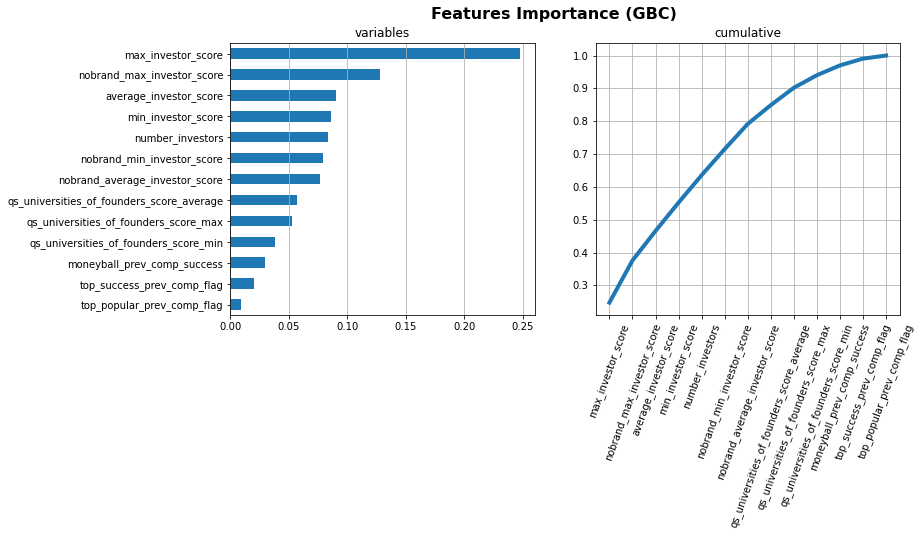

In [490]:
importances = GBC_model.feature_importances_

# Add to a df
df_importances = pd.DataFrame({'IMPORTANCE':importances, 'VARIABLE':combined_features}).sort_values('IMPORTANCE', ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index('VARIABLE')

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance (GBC)", fontsize=16, fontweight='bold')
ax[0].title.set_text('variables')
df_importances[['IMPORTANCE']].sort_values(by='IMPORTANCE').plot(kind='barh', legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel='')
ax[1].title.set_text('cumulative')
df_importances[['cumsum']].plot(kind='line', linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

# Support Vector Machine (SVC)

Only founder features 

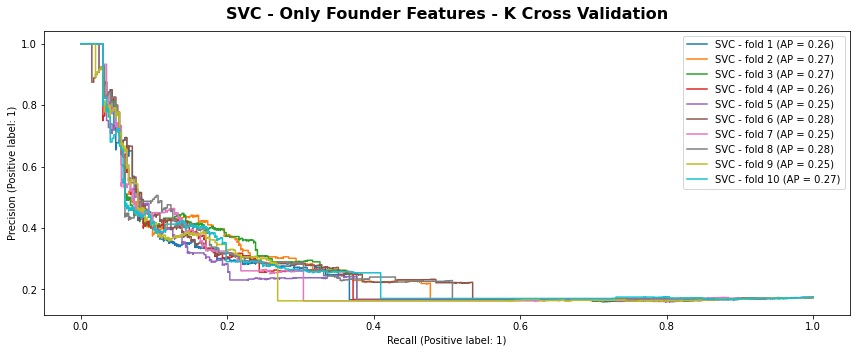

In [493]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_founder, y, stratify=y, test_size=test_size)

# Hyperparameters
SVC_params = {} #{'C': 0.1}
           
# Define the final model
SVC_model = SVC(**SVC_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    SVC_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(SVC_model, X_test, y_test, ax = plt.gca(), name="SVC - fold "+str(i+1))
plt.legend(loc='upper right')
plt.title('SVC - Only Founder Features - K Cross Validation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

Only investor features

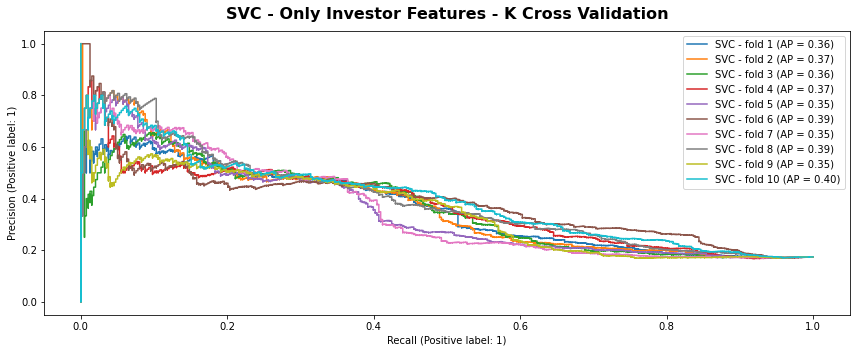

In [495]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_investor, y, stratify=y, test_size=test_size)

# Define the final model
SVC_model = SVC(**SVC_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    SVC_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(SVC_model, X_test, y_test, ax = plt.gca(), name="SVC - fold "+str(i+1))
plt.legend(loc='upper right')
plt.title('SVC - Only Investor Features - K Cross Validation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

Combined founders and investor features

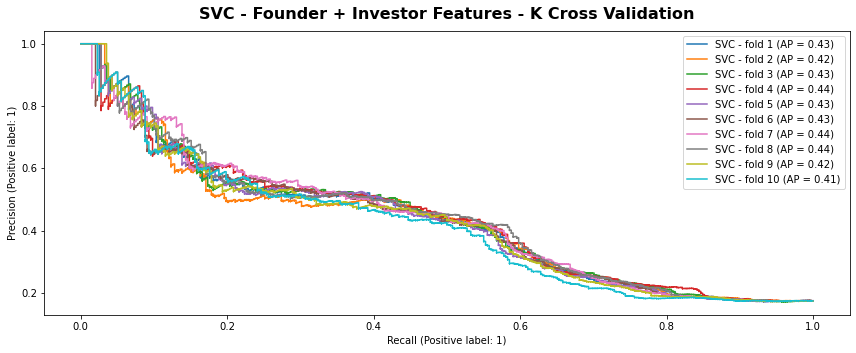

In [496]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, stratify=y, test_size=test_size)

# Define the final model
SVC_model = SVC(**SVC_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    SVC_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(SVC_model, X_test, y_test, ax = plt.gca(), name="SVC - fold "+str(i+1))
plt.legend(loc='upper right')
plt.title('SVC - Founder + Investor Features - K Cross Validation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Random Forests (RF)

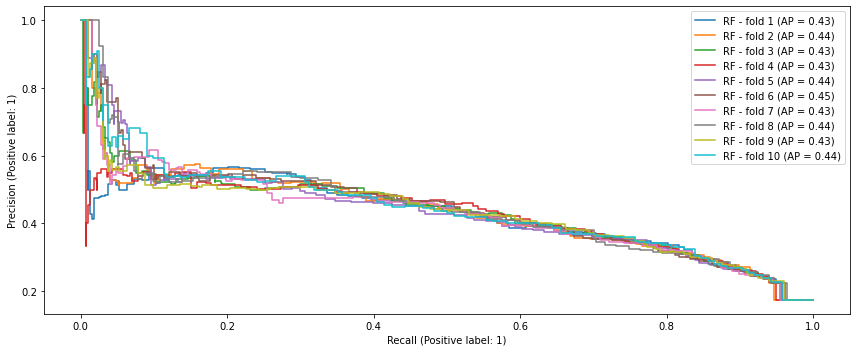

In [324]:
# Hyperparameters
GBC_params = {'loss': 'deviance',
              'n_estimators': 50,
              'learning_rate': 0.4,
              'subsample': 1}

# Define the final model
RF_model = RandomForestClassifier(**RF_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    RF_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(RF_model, X_test, y_test, ax = plt.gca(), name="RF - fold "+str(i+1))
plt.legend(loc='upper right')
plt.tight_layout()

# K-Nearest Neighbours (KNN)

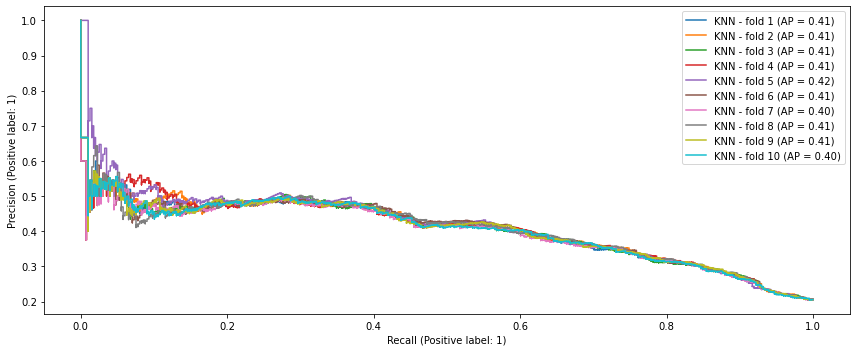

In [328]:
# Hyperparameters
KNN_params = {'n_neighbors': 1000,
              'weights': 'distance',
              'algorithm': 'auto',
              'leaf_size': 100}

# Define the final model
KNN_model = KNeighborsClassifier(**KNN_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    KNN_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(KNN_model, X_test, y_test, ax = plt.gca(), name="KNN - fold "+str(i+1))
plt.legend(loc='upper right')
plt.tight_layout()

# Support Vector Machine (SVC)

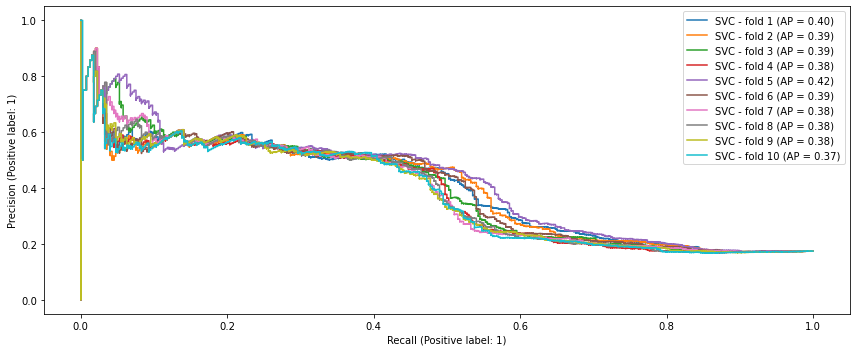

In [366]:
# Hyperparameters
SVC_params = {'C': 0.1}
           
# Define the final model
SVC_model = SVC(**SVC_params)

# Number of Splits
num_splits = 10

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    SVC_model.fit(X_train[train], y_train[train])
    plot_precision_recall_curve(SVC_model, X_test, y_test, ax = plt.gca(), name="SVC - fold "+str(i+1))
plt.legend(loc='upper right')
plt.tight_layout()

In [244]:
# Hyperparameters
RF_params = {'n_estimators': 100,
             'max_features': 'auto',
             'max_depth': 100,
             'class_weight': 'balanced'}

# Define the final model
GBC_model = GradientBoostingClassifier(**GBC_params)
GBC_model = GBC_model.fit(X_train, y_train)
GBC_pred = GBC_model.predict(X_test)
GBC_pred_prob = GBC_model.predict_proba(X_test)[:,1]

# Accuray & AUC
accuracy = metrics.accuracy_score(y_test, GBC_pred)
auc = metrics.roc_auc_score(y_test, GBC_pred_prob)
print('\nAccuracy (overall correct predictions):',  round(accuracy,2))
print('AUC:', round(auc,2))

# Precision & Recall
recall = metrics.recall_score(y_test, GBC_pred)
precision = metrics.precision_score(y_test, GBC_pred)
print('Recall (all 1s predicted right):', round(recall, 2))
print('Precision (confidence when predicting a 1)', round(precision, 2), '')
print('\nOverall Classification Report:')
print(metrics.classification_report(y_test, GBC_pred, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.83
AUC: 0.78
Recall (all 1s predicted right): 0.24
Precision (confidence when predicting a 1) 0.51 

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1887
           1       0.51      0.24      0.33       398

    accuracy                           0.83      2285
   macro avg       0.68      0.60      0.61      2285
weighted avg       0.80      0.83      0.80      2285



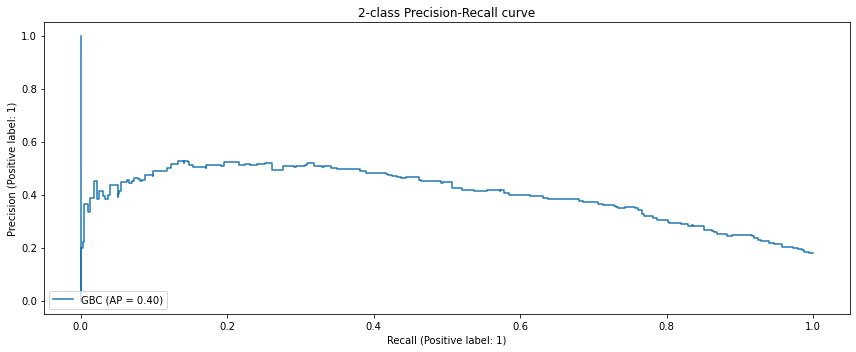

In [245]:
display = PrecisionRecallDisplay.from_estimator(GBC_model, X_test, y_test, name="GBC")
_ = display.ax_.set_title("2-class Precision-Recall curve")
plt.tight_layout()


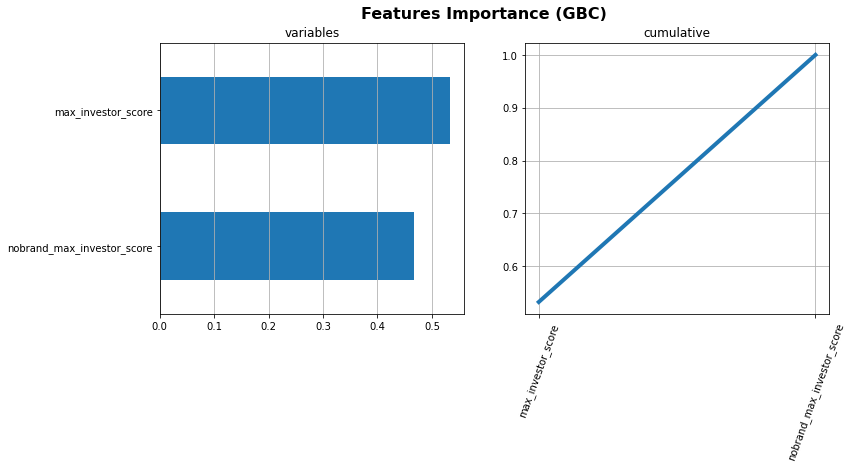

In [238]:
importances = GBC_model.feature_importances_

# Add to a df
df_importances = pd.DataFrame({'IMPORTANCE':importances, 'VARIABLE':selected_features}).sort_values('IMPORTANCE', ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index('VARIABLE')

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance (GBC)", fontsize=16, fontweight='bold')
ax[0].title.set_text('variables')
df_importances[['IMPORTANCE']].sort_values(by='IMPORTANCE').plot(kind='barh', legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel='')
ax[1].title.set_text('cumulative')
df_importances[['cumsum']].plot(kind='line', linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

# Random Forests

## Initial Model & K-fold Cross Validation (Random Forests)


 Mean AUC: 0.7744573413494794


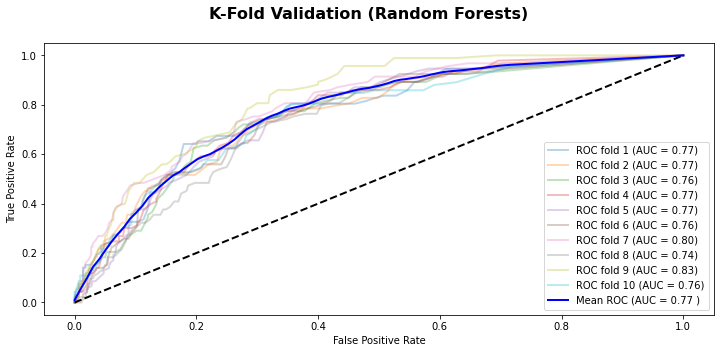

In [100]:
num_splits = 10

# RF hyperparameters
RF_params = {'n_estimators': 100,
             'max_features': 'auto',
             'max_depth': 500,
             'class_weight': 'balanced'}
RF_params = {}

# Define the RF model
RF_model = RandomForestClassifier(**RF_params)

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    prediction = RF_model.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    
# Matplotlib styling
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig.suptitle('K-Fold Validation (Random Forests)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
print('\n Mean AUC:', mean_auc)

## Evaluation & Scoring (Random Forests)

In [247]:
# Define the final model
RF_model = RandomForestClassifier(**RF_params)
RF_model = RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
RF_pred_prob = RF_model.predict_proba(X_test)[:,1]

# Accuray & AUC
accuracy = metrics.accuracy_score(y_test, RF_pred)
auc = metrics.roc_auc_score(y_test, RF_pred_prob)
print('\nAccuracy (overall correct predictions):',  round(accuracy,2))
print('AUC:', round(auc,2))

# Precision & Recall
recall = metrics.recall_score(y_test, RF_pred)
precision = metrics.precision_score(y_test, RF_pred)
print('Recall (all 1s predicted right):', round(recall, 2))
print('Precision (confidence when predicting a 1)', round(precision, 2), '')
print('\nOverall Classification Report:')
print(metrics.classification_report(y_test, RF_pred, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.82
AUC: 0.76
Recall (all 1s predicted right): 0.41
Precision (confidence when predicting a 1) 0.48 

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1887
           1       0.48      0.41      0.45       398

    accuracy                           0.82      2285
   macro avg       0.68      0.66      0.67      2285
weighted avg       0.81      0.82      0.82      2285



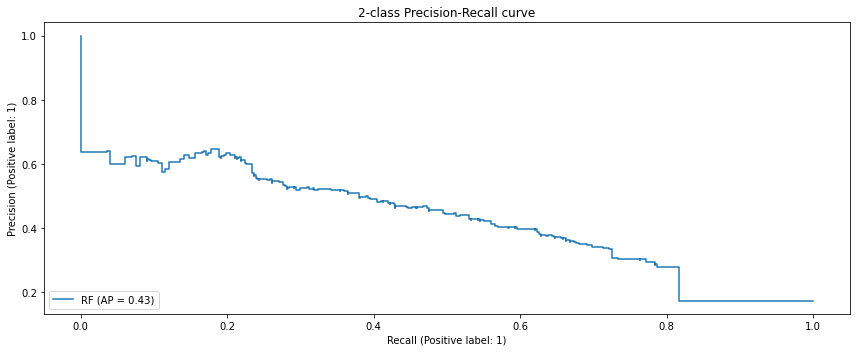

In [248]:
display = PrecisionRecallDisplay.from_estimator(RF_model, X_test, y_test, name="RF")
_ = display.ax_.set_title("2-class Precision-Recall curve")
plt.tight_layout()

# KNN

## Initial Model & K-fold Cross Validation (KNN)


 Mean AUC: 0.7861316748662854


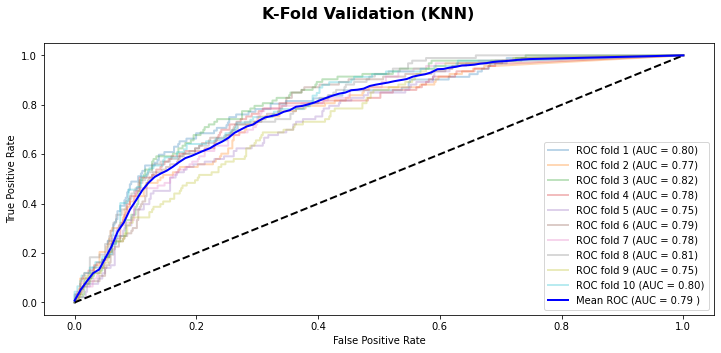

In [146]:
num_splits = 10

# RF hyperparameters
KNN_params = {'n_neighbors': 1000,
              'weights': 'distance',
              'algorithm': 'auto',
              'leaf_size': 100}

# Define the RF model
KNN_model = KNeighborsClassifier(**KNN_params)

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    prediction = KNN_model.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    
# Matplotlib styling
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig.suptitle('K-Fold Validation (KNN)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
print('\n Mean AUC:', mean_auc)

## Evaluation & Scoring (KNN)

In [249]:
# Define the final model
KNN_model = KNeighborsClassifier(**KNN_params)
KNN_model = KNN_model.fit(X_train, y_train)
KNN_pred = KNN_model.predict(X_test)
KNN_pred_prob = KNN_model.predict_proba(X_test)[:,1]

# Accuray & AUC
accuracy = metrics.accuracy_score(y_test, KNN_pred)
auc = metrics.roc_auc_score(y_test, KNN_pred_prob)
print('\nAccuracy (overall correct predictions):',  round(accuracy,2))
print('AUC:', round(auc,2))

# Precision & Recall
recall = metrics.recall_score(y_test, KNN_pred)
precision = metrics.precision_score(y_test, KNN_pred)
print('Recall (all 1s predicted right):', round(recall, 2))
print('Precision (confidence when predicting a 1)', round(precision, 2), '')
print('\nOverall Classification Report:')
print(metrics.classification_report(y_test, KNN_pred, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.84
AUC: 0.78
Recall (all 1s predicted right): 0.35
Precision (confidence when predicting a 1) 0.57 

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1887
           1       0.57      0.35      0.44       398

    accuracy                           0.84      2285
   macro avg       0.72      0.65      0.67      2285
weighted avg       0.82      0.84      0.83      2285



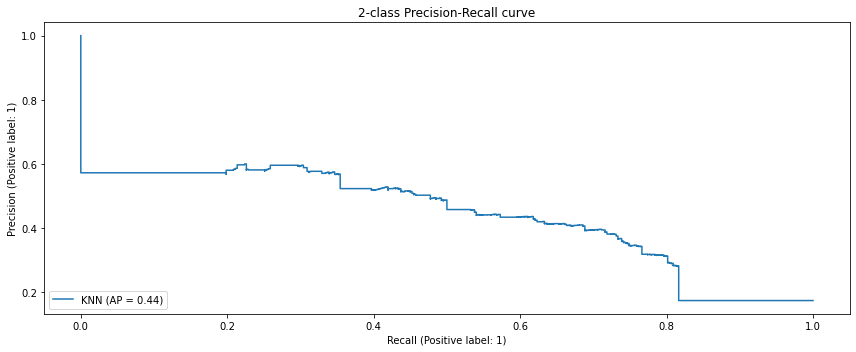

In [250]:
display = PrecisionRecallDisplay.from_estimator(KNN_model, X_test, y_test, name="KNN")
_ = display.ax_.set_title("2-class Precision-Recall curve")
plt.tight_layout()

# SVC

## Initial Model & K-fold Cross Validation (SVC)


 Mean AUC: 0.521865360583635


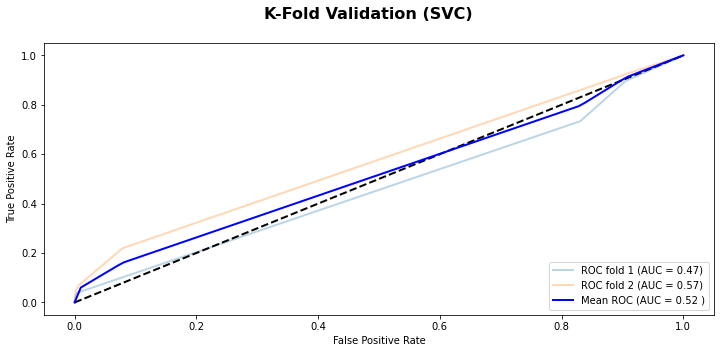

In [180]:
num_splits = 2

# RF hyperparameters
SVC_params = {'C': 0.1}
#SVC_params = {}

# Define the SVC model
SVC_model = SVC(**SVC_params, probability=True)

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    prediction = SVC_model.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    
# Matplotlib styling
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig.suptitle('K-Fold Validation (SVC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
print('\n Mean AUC:', mean_auc)

## Evaluation & Scoring (SVC)

In [251]:
# Define the final model
SVC_model = SVC(**SVC_params, probability=True)
SVC_model = SVC_model.fit(X_train, y_train)
SVC_pred = SVC_model.predict(X_test)
SVC_pred_prob = SVC_model.predict_proba(X_test)[:,1]

# Accuray & AUC
accuracy = metrics.accuracy_score(y_test, SVC_pred)
auc = metrics.roc_auc_score(y_test, SVC_pred_prob)
print('\nAccuracy (overall correct predictions):',  round(accuracy,2))
print('AUC:', round(auc,2))

# Precision & Recall
recall = metrics.recall_score(y_test, SVC_pred)
precision = metrics.precision_score(y_test, SVC_pred)
print('Recall (all 1s predicted right):', round(recall, 2))
print('Precision (confidence when predicting a 1)', round(precision, 2), '')
print('\nOverall Classification Report:')
print(metrics.classification_report(y_test, SVC_pred, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.83
AUC: 0.68
Recall (all 1s predicted right): 0.0
Precision (confidence when predicting a 1) 0.0 

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1887
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2285
   macro avg       0.41      0.50      0.45      2285
weighted avg       0.68      0.83      0.75      2285



# GBC

## Initial Model & K-fold Cross Validation (GBC)


 Mean AUC: 0.8053708054322769


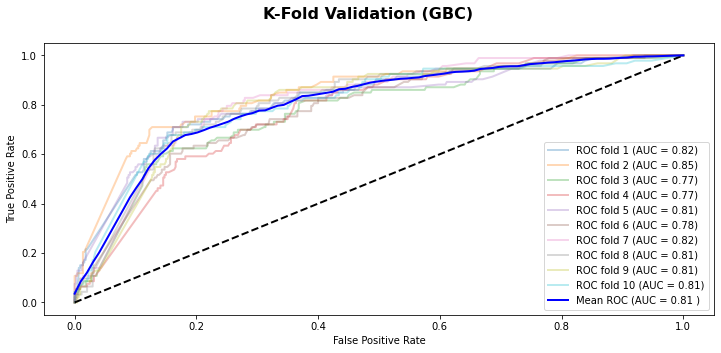

In [172]:
num_splits = 10

# RF hyperparameters
GBC_params = {'loss': 'deviance',
              'n_estimators': 500,
              'learning_rate': 0.1,
              'subsample': 1}
#GBC_params = {}

# Define the GBC model
GBC_model = GradientBoostingClassifier(**GBC_params)

# K-fold validation
cv = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)

# Plot results
fig = plt.figure()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    prediction = GBC_model.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
    tprs.append(scipy.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    
# Matplotlib styling
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig.suptitle('K-Fold Validation (GBC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
print('\n Mean AUC:', mean_auc)

## Evaluation & Scoring (GBC)

In [190]:
# Define the final model
GBC_model = GradientBoostingClassifier(**GBC_params)
GBC_model = GBC_model.fit(X_train, y_train)
GBC_pred = GBC_model.predict(X_test)
GBC_pred_prob = GBC_model.predict_proba(X_test)[:,1]

# Accuray & AUC
accuracy = metrics.accuracy_score(y_test, GBC_pred)
auc = metrics.roc_auc_score(y_test, GBC_pred_prob)
print('\nAccuracy (overall correct predictions):',  round(accuracy,2))
print('AUC:', round(auc,2))

# Precision & Recall
recall = metrics.recall_score(y_test, GBC_pred)
precision = metrics.precision_score(y_test, GBC_pred)
print('Recall (all 1s predicted right):', round(recall, 2))
print('Precision (confidence when predicting a 1)', round(precision, 2), '')
print('\nOverall Classification Report:')
print(metrics.classification_report(y_test, GBC_pred, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.83
AUC: 0.59
Recall (all 1s predicted right): 0.04
Precision (confidence when predicting a 1) 0.89 

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1887
           1       0.89      0.04      0.08       398

    accuracy                           0.83      2285
   macro avg       0.86      0.52      0.49      2285
weighted avg       0.84      0.83      0.76      2285



## Feature Analysis & Importance (GBC)

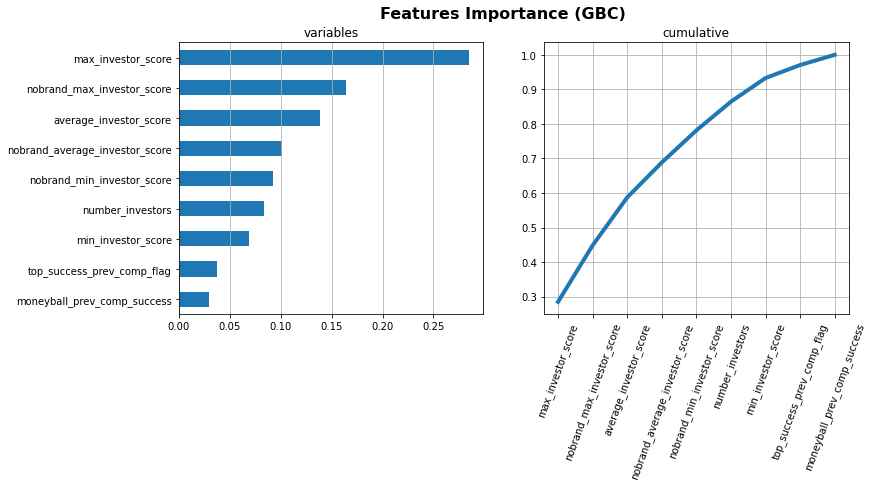

In [187]:
importances = GBC_model.feature_importances_

# Add to a df
df_importances = pd.DataFrame({'IMPORTANCE':importances, 'VARIABLE':selected_features}).sort_values('IMPORTANCE', ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index('VARIABLE')

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance (GBC)", fontsize=16, fontweight='bold')
ax[0].title.set_text('variables')
df_importances[['IMPORTANCE']].sort_values(by='IMPORTANCE').plot(kind='barh', legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel='')
ax[1].title.set_text('cumulative')
df_importances[['cumsum']].plot(kind='line', linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

# NN

In [1]:
number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
#model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
#model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
#model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
#set_random_state()
model.fit(X_train, y_train, epochs= 100, verbose = 0)


NameError: name 'X_train' is not defined

### Hyperparameter tuning (Random Forests)

In [91]:
"""
RF = RandomForestClassifier()

# Hyperparameter cobinations to try
params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], # number of trees in the forest
          'max_features': ['auto', 'sqrt'], # number of features to consider at every split
          'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] # maximum number of levels in tree}

# Random search
random_search = model_selection.RandomizedSearchCV(RF, 
                                                   param_distributions=params, 
                                                   n_iter=100, 
                                                   cv=3,
                                                   scoring='accuracy',
                                                   verbose=2).fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
""";

### Feature Importance (Random Forests)